In [1]:
!pip  install Pillow matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Step 0: Sₜ=1.00000000, R(Sₜ)=0.54030231, Δ=4.60e-01
Step 1: Sₜ=0.54030231, R(Sₜ)=0.85755322, Δ=3.17e-01
Step 2: Sₜ=0.85755322, R(Sₜ)=0.65428979, Δ=2.03e-01
Step 3: Sₜ=0.65428979, R(Sₜ)=0.79348036, Δ=1.39e-01
Step 4: Sₜ=0.79348036, R(Sₜ)=0.70136877, Δ=9.21e-02
Step 5: Sₜ=0.70136877, R(Sₜ)=0.76395968, Δ=6.26e-02
Step 6: Sₜ=0.76395968, R(Sₜ)=0.72210243, Δ=4.19e-02
Step 7: Sₜ=0.72210243, R(Sₜ)=0.75041776, Δ=2.83e-02
Step 8: Sₜ=0.75041776, R(Sₜ)=0.73140404, Δ=1.90e-02
Step 9: Sₜ=0.73140404, R(Sₜ)=0.74423735, Δ=1.28e-02
Step 10: Sₜ=0.74423735, R(Sₜ)=0.73560474, Δ=8.63e-03
Step 11: Sₜ=0.73560474, R(Sₜ)=0.74142509, Δ=5.82e-03
Step 12: Sₜ=0.74142509, R(Sₜ)=0.73750689, Δ=3.92e-03
Step 13: Sₜ=0.73750689, R(Sₜ)=0.74014734, Δ=2.64e-03
Step 14: Sₜ=0.74014734, R(Sₜ)=0.73836920, Δ=1.78e-03
Step 15: Sₜ=0.73836920, R(Sₜ)=0.73956720, Δ=1.20e-03
Step 16: Sₜ=0.73956720, R(Sₜ)=0.73876032, Δ=8.07e-04
Step 17: Sₜ=0.73876032, R(Sₜ)=0.73930389, Δ=5.44e-04
Step 18: Sₜ=0.73930389, R(Sₜ)=0.73893776, Δ=3.66e-04
Ste

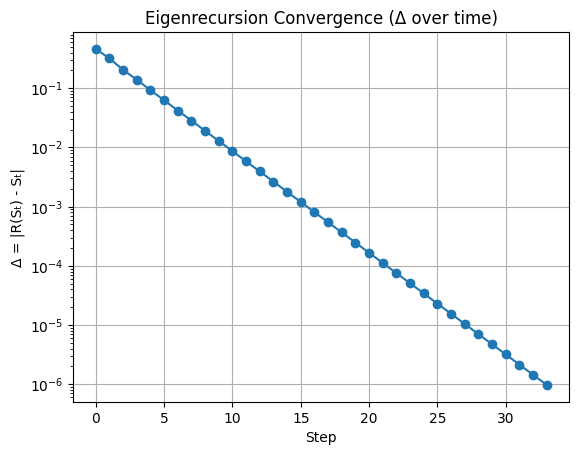

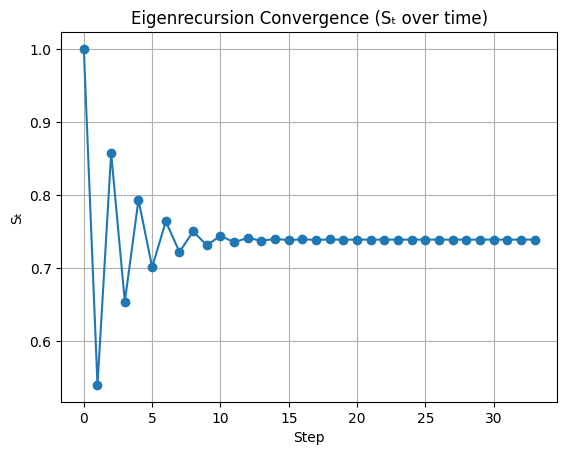

In [2]:
import math
import matplotlib.pyplot as plt
import json
import os

# Recursive function: Sₜ₊₁ = R(Sₜ) = cos(Sₜ)
def run_eigenrecursion(start=1.0, epsilon=1e-6, max_steps=100):
    s = start
    log = []
    for t in range(max_steps):
        r = math.cos(s)
        delta = abs(r - s)
        log.append((t, s, r, delta))
        if delta < epsilon:
            break
        s = r
    return log

# Run the test
epsilon = 1e-6
log = run_eigenrecursion()

# Create the results directory if it doesn't exist
if not os.path.exists('results'):
    os.makedirs('results')

# Print results
for t, s_t, r_t, delta in log:
    print(f"Step {t}: Sₜ={s_t:.8f}, R(Sₜ)={r_t:.8f}, Δ={delta:.2e}")

# Plot convergence
plt.figure() # Create a new figure for the first plot
plt.plot([l[0] for l in log], [l[3] for l in log], marker='o')
plt.yscale('log')
plt.title("Eigenrecursion Convergence (Δ over time)")
plt.xlabel("Step")
plt.ylabel("Δ = |R(Sₜ) - Sₜ|")
plt.grid(True)
plt.savefig('results/eigenrecursion_convergence_delta.png', dpi=300, bbox_inches='tight')


# Plot S_t over time
plt.figure() # Create a new figure for the second plot
plt.plot([l[0] for l in log], [l[1] for l in log], marker='o')
plt.title("Eigenrecursion Convergence (Sₜ over time)")
plt.xlabel("Step")
plt.ylabel("Sₜ")
plt.grid(True)
plt.savefig('results/eigenrecursion_convergence_st.png', dpi=300, bbox_inches='tight')
plt.show()


# Save log data
log_data = [{"step": t, "S_t": s_t, "R_S_t": r_t, "delta": delta} for t, s_t, r_t, delta in log]
with open('results/eigenrecursion_log.json', 'w') as f:
    json.dump(log_data, f, indent=2)

# Save summary
summary = {
    "final_eigenstate": log[-1][1],
    "convergence_steps": len(log),
    "final_delta": log[-1][3],
    "convergence_achieved": log[-1][3] < epsilon
}
with open('results/eigenrecursion_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

In [3]:
import os
from pathlib import Path
from PIL import Image

# Export helper: copies PNGs from results/ into paper_figures/ and also saves PDFs
results_dir = Path("results")
paper_dir = Path("paper_figures")
paper_dir.mkdir(exist_ok=True)

for img_path in results_dir.glob("*.png"):
    dest_png = paper_dir / img_path.name
    # Copy PNG
    with Image.open(img_path) as im:
        im.save(dest_png, format="PNG")
    # Also save a PDF version
    pdf_path = paper_dir / (img_path.stem + ".pdf")
    with Image.open(img_path) as im:
        if im.mode in ("RGBA", "LA"):
            bg = Image.new("RGB", im.size, (255,255,255))
            bg.paste(im, mask=im.split()[3])
            bg.save(pdf_path, format="PDF", resolution=300)
        else:
            im.convert("RGB").save(pdf_path, format="PDF", resolution=300)

print(f"Exported images from {results_dir} to {paper_dir}.")

Exported images from results to paper_figures.
